## Nomi di animali e algebra lineare

Inizieremo considerando un piccolo sottoinsieme di parole inglesi: parole di animali. Il nostro obiettivo è riuscire a scrivere un programma per trovare somiglianze tra queste parole e le creature che designano. Per fare questo, potremmo iniziare creando un foglio di calcolo di alcuni animali e delle loro caratteristiche. Per esempio:

![Foglio di calcolo degli animali](http://static.decontextualize.com/snaps/animal-spreadsheet.png)

Questo foglio di calcolo associa un animale a due numeri: la loro carineria e la loro taglia, entrambi in un intervallo da zero a cento. (I valori si basano semplicemente su un giudizio arbitrario. Il tuo gusto per la carineria e la valutazione delle dimensioni può differire in modo significativo dal mio. Come con tutti i dati, questi dati sono semplicemente un riflesso speculare della persona che li ha raccolti.)

Questi valori ci danno tutto ciò di cui abbiamo bisogno per determinare quali animali sono simili (almeno, simili nelle proprietà che abbiamo incluso nei dati). Prova a rispondere alla seguente domanda: quale animale è più simile a un capibara? Potresti passare attraverso i valori uno per uno e fare la matematica per fare quella valutazione, ma visualizzare i dati come punti nello spazio bidimensionale rende molto intuitivo trovare la risposta:

![Spazio animale](http://static.decontextualize.com/snaps/animal-space.png)

La trama ci mostra che l'animale più vicino al capibara è l'orso panda (di nuovo, in termini di dimensioni soggettive e dolcezza). Un modo per calcolare quanto "distanti" sono due punti è trovare la loro *distanza euclidea*. (Questa è semplicemente la lunghezza della linea che collega i due punti.) Per i punti in due dimensioni, la distanza euclidea può essere calcolata con la seguente funzione Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vect_capybara = np.array([70,30])
vect_panda_bear = np.array([75,40])
vect_elephant = np.array([65,90])

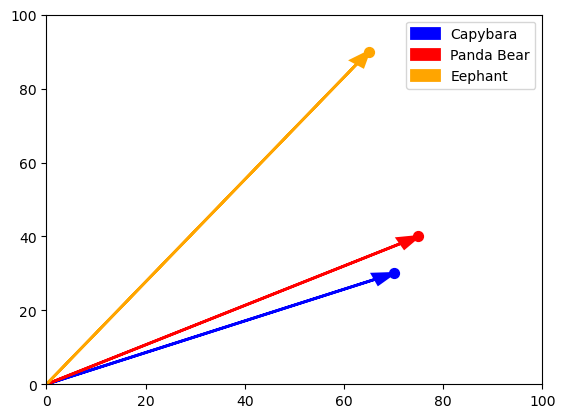

In [3]:
import matplotlib.pyplot as plt

plt.arrow(0,0, vect_capybara[0], vect_capybara[1], color='blue',  linewidth=2, \
          head_width=3, head_length=4, length_includes_head=True, label="Capybara")
plt.arrow(0,0, vect_panda_bear[0], vect_panda_bear[1], color='red', linewidth=2, \
          head_width=3, head_length=4, length_includes_head=True, label="Panda Bear")
plt.arrow(0,0, vect_elephant[0], vect_elephant[1], color='orange', linewidth=2, \
          head_width=3, head_length=4, length_includes_head=True, label="Eephant")


plt.scatter(vect_capybara[0], vect_capybara[1], s=50, c='blue', marker='o')
plt.scatter(vect_panda_bear[0], vect_panda_bear[1], s=50, c='red', marker='o')
plt.scatter(vect_elephant[0], vect_elephant[1], s=50, c='orange', marker='o')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.show()

Quanto vale la distanza tra "capybara" (70, 30) e "elefante" (74, 40)?

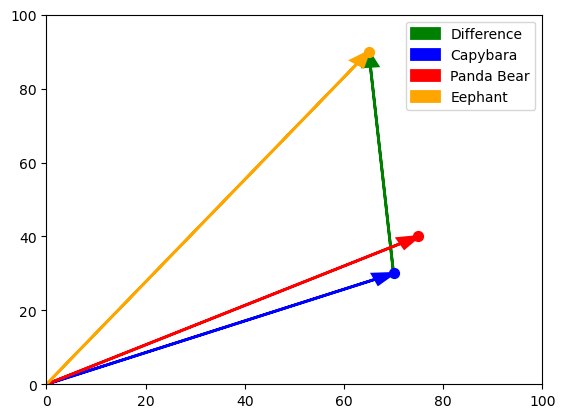

In [4]:
diff=vect_elephant-vect_capybara

plt.arrow(vect_capybara[0], vect_capybara[1], diff[0], diff[1], color='green', linewidth=2, \
          head_width=3, head_length=4, length_includes_head=True, label="Difference")

plt.arrow(0,0, vect_capybara[0], vect_capybara[1], color='blue',  linewidth=2, \
          head_width=3, head_length=4, length_includes_head=True, label="Capybara")
plt.arrow(0,0, vect_panda_bear[0], vect_panda_bear[1], color='red', linewidth=2, \
          head_width=3, head_length=4, length_includes_head=True, label="Panda Bear")
plt.arrow(0,0, vect_elephant[0], vect_elephant[1], color='orange', linewidth=2, \
          head_width=3, head_length=4, length_includes_head=True, label="Eephant")


plt.scatter(vect_capybara[0], vect_capybara[1], s=50, c='blue', marker='o')
plt.scatter(vect_panda_bear[0], vect_panda_bear[1], s=50, c='red', marker='o')
plt.scatter(vect_elephant[0], vect_elephant[1], s=50, c='orange', marker='o')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.show()

Come calcoliamo la distanza tra l'Elefante e il Capybara?
$d(elefante, capybara) = d(vect-capybara, vect-elephant)$

In [13]:
distance1 = np.sqrt(np.dot(diff,diff))
distance1

60.207972893961475

Modellare gli animali in questo modo ha alcune altre proprietà interessanti. Ad esempio, puoi scegliere un punto arbitrario nello "spazio animale" e quindi trovare l'animale più vicino a quel punto. Se immagini un animale di taglia 25 e carineria 30, puoi facilmente guardare lo spazio per trovare l'animale che si adatta meglio a quella descrizione: il pollo.

Ragionando visivamente, puoi anche rispondere a domande del tipo: cosa c'è a metà strada tra un pollo e un elefante? Traccia semplicemente una linea da "elefante" a "pollo", segna il punto medio e trova l'animale più vicino. (Secondo la nostra tabella, a metà strada tra un elefante e un pollo c'è un cavallo.)

Puoi anche chiedere: qual è la *differenza* tra un criceto e una tarantola? Secondo la nostra trama, sono circa settantacinque unità di carino (e poche unità di dimensione).

La relazione di "differenza" è interessante, perché ci permette di ragionare su relazioni *analogiche*. Nella tabella qui sotto, ho disegnato una freccia da "tarantola" a "criceto" (in blu):

![Analogia animale](http://static.decontextualize.com/snaps/animal-space-analogy.png)

Puoi interpretare questa freccia come la *relazione* tra una tarantola e un criceto, in termini di dimensioni e carineria (ad esempio, criceti e tarantole hanno all'incirca le stesse dimensioni, ma i criceti sono molto più carini). Nello stesso diagramma, ho anche trasposto la stessa freccia (questa volta in rosso) in modo che il suo punto di origine sia "pollo". La freccia termina più vicino a "gattino". Quello che abbiamo scoperto è che l'animale che ha all'incirca le stesse dimensioni di un pollo ma molto più carino è... un gattino. Per dirla in termini di analogia:

     Le tarantole stanno ai criceti come le galline stanno ai gattini.
    
Una sequenza di numeri usata per identificare un punto è chiamata *vettore*, e il tipo di matematica che abbiamo fatto finora è chiamato *algebra lineare* (l'algebra lineare è sorprendentemente utile in molti domini: è lo stesso tipo di matematica che potresti fare, ad esempio, per simulare la velocità e l'accelerazione di uno sprite in un videogioco.)

Un insieme di vettori che fanno tutti parte dello stesso insieme di dati è spesso chiamato *spazio vettoriale*. Lo spazio vettoriale degli animali in questa sezione ha due *dimensioni*, con cui intendo che ogni vettore nello spazio ha due numeri ad esso associati (cioè due colonne nel foglio di calcolo). Il fatto che questo spazio abbia due dimensioni rende facile *visualizzare* lo spazio disegnando una trama 2D. Ma la maggior parte degli spazi vettoriali con cui lavorerai avrà più di due dimensioni, a volte molte centinaia. In quei casi, è più difficile visualizzare lo "spazio", ma la matematica funziona più o meno allo stesso modo.

## Linguaggio con vettori: colori

Fin qui tutto bene. Abbiamo un sistema in atto, sebbene altamente soggettivo, per parlare di animali e delle parole usate per nominarli. Voglio parlare di un altro spazio vettoriale che ha a che fare con il linguaggio: lo spazio vettoriale dei colori.

I colori sono spesso rappresentati nei computer come vettori con tre dimensioni: rosso, verde e blu. Proprio come con gli animali nella sezione precedente, possiamo usare questi vettori per rispondere a domande come: quali colori sono simili? Qual è il nome di colore più probabile per un insieme di valori scelti arbitrariamente per rosso, verde e blu? Dati i nomi di due colori, qual è il nome della "media" di quei colori?

Lavoreremo con questi [dati sui colori](https://github.com/dariusk/corpora/blob/master/data/colors/xkcd.json) 
dal [sondaggio sui colori xkcd](https://blog.xkcd.com/2010/05/03/color-survey-results/). 

I dati mettono in relazione un nome di colore con il valore RGB associato a quel colore. 

[Ecco una pagina che mostra l'aspetto dei colori](https://xkcd.com/color/rgb/). Scarica i dati sui colori e inseriscili nella stessa directory di questo taccuino.

In [6]:
import json
import requests
import pandas as pd

In [7]:
url = "https://raw.githubusercontent.com/dariusk/corpora/master/data/colors/xkcd.json"
response = requests.get(url)

if response.status_code == 200:
    color_data = json.loads(response.content)
    print(color_data)
else:
    print("Errore durante la richiesta del file JSON")

{'description': 'The 954 most common RGB monitor colors, as defined by several hundred thousand participants in the xkcd color name survey.', 'colors': [{'color': 'cloudy blue', 'hex': '#acc2d9'}, {'color': 'dark pastel green', 'hex': '#56ae57'}, {'color': 'dust', 'hex': '#b2996e'}, {'color': 'electric lime', 'hex': '#a8ff04'}, {'color': 'fresh green', 'hex': '#69d84f'}, {'color': 'light eggplant', 'hex': '#894585'}, {'color': 'nasty green', 'hex': '#70b23f'}, {'color': 'really light blue', 'hex': '#d4ffff'}, {'color': 'tea', 'hex': '#65ab7c'}, {'color': 'warm purple', 'hex': '#952e8f'}, {'color': 'yellowish tan', 'hex': '#fcfc81'}, {'color': 'cement', 'hex': '#a5a391'}, {'color': 'dark grass green', 'hex': '#388004'}, {'color': 'dusty teal', 'hex': '#4c9085'}, {'color': 'grey teal', 'hex': '#5e9b8a'}, {'color': 'macaroni and cheese', 'hex': '#efb435'}, {'color': 'pinkish tan', 'hex': '#d99b82'}, {'color': 'spruce', 'hex': '#0a5f38'}, {'color': 'strong blue', 'hex': '#0c06f7'}, {'color

In [9]:
# creo il dataframe con i colori
dataframe_color=pd.DataFrame(color_data['colors'])

In [11]:
dataframe_color

,color,hex
0,cloudy blue,#acc2d9
1,dark pastel green,#56ae57
2,dust,#b2996e
3,electric lime,#a8ff04
4,fresh green,#69d84f
...,...,...
944,brown,#653700
945,pink,#ff81c0
946,blue,#0343df
947,green,#15b01a


The following function converts colors from hex format (`#1a2b3c`) to a tuple of integers:

In [14]:
def hex_to_int(s):
    s = s.lstrip("#")
    return int(s[:2], 16), int(s[2:4], 16), int(s[4:6], 16)

And the following cell creates a dictionary and populates it with mappings from color names to RGB vectors for each color in the data:

# Una nuova struttura dati: Il Dictionary

Un **Dictionary** in Python è un oggetto di tipo dict che può essere visto come una collezione di coppie "chiave"-valore: (key, value). In un dizionario, non ci sono due coppie con lo stesso valore della chiave key.

In [15]:
#Creiamo un dictionary
my_information = {'name': 'Dionysia', 'age': 28, 'location': 'Athens'}
print(my_information)

{'name': 'Dionysia', 'age': 28, 'location': 'Athens'}


In [16]:
#check data type
print(type(my_information))

<class 'dict'>


In [19]:
my_information['age']

28

In [20]:
my_information.keys()

dict_keys(['name', 'age', 'location'])

In [21]:
my_information.values()

dict_values(['Dionysia', 28, 'Athens'])

Ora usiamo questa struttura dati

In [22]:
colors = dict()
red=[];green=[];blue=[]
for item in color_data['colors']:
    a,b,c = hex_to_int(item["hex"])
    colors[item["color"]] = np.array([a,b,c])
    red.append(a)
    green.append(b)
    blue.append(c)
dataframe_color['R']=red
dataframe_color['G']=green
dataframe_color['B']=blue

In [23]:
colors

{'cloudy blue': array([172, 194, 217]),
 'dark pastel green': array([ 86, 174,  87]),
 'dust': array([178, 153, 110]),
 'electric lime': array([168, 255,   4]),
 'fresh green': array([105, 216,  79]),
 'light eggplant': array([137,  69, 133]),
 'nasty green': array([112, 178,  63]),
 'really light blue': array([212, 255, 255]),
 'tea': array([101, 171, 124]),
 'warm purple': array([149,  46, 143]),
 'yellowish tan': array([252, 252, 129]),
 'cement': array([165, 163, 145]),
 'dark grass green': array([ 56, 128,   4]),
 'dusty teal': array([ 76, 144, 133]),
 'grey teal': array([ 94, 155, 138]),
 'macaroni and cheese': array([239, 180,  53]),
 'pinkish tan': array([217, 155, 130]),
 'spruce': array([10, 95, 56]),
 'strong blue': array([ 12,   6, 247]),
 'toxic green': array([ 97, 222,  42]),
 'windows blue': array([ 55, 120, 191]),
 'blue blue': array([ 34,  66, 199]),
 'blue with a hint of purple': array([ 83,  60, 198]),
 'booger': array([155, 181,  60]),
 'bright sea green': array([  

In [24]:
dataframe_color

,color,hex,R,G,B
0,cloudy blue,#acc2d9,172,194,217
1,dark pastel green,#56ae57,86,174,87
2,dust,#b2996e,178,153,110
3,electric lime,#a8ff04,168,255,4
4,fresh green,#69d84f,105,216,79
...,...,...,...,...,...
944,brown,#653700,101,55,0
945,pink,#ff81c0,255,129,192
946,blue,#0343df,3,67,223
947,green,#15b01a,21,176,26


Testing it out:

In [25]:
colors['olive']

array([110, 117,  14])

In [30]:
colors['red']

array([229,   0,   0])

Proviamo a visualizzare il nostro spazio vettoriale dei colori
Ogni colore è un vettore di dim 3

<IPython.core.display.Javascript object>


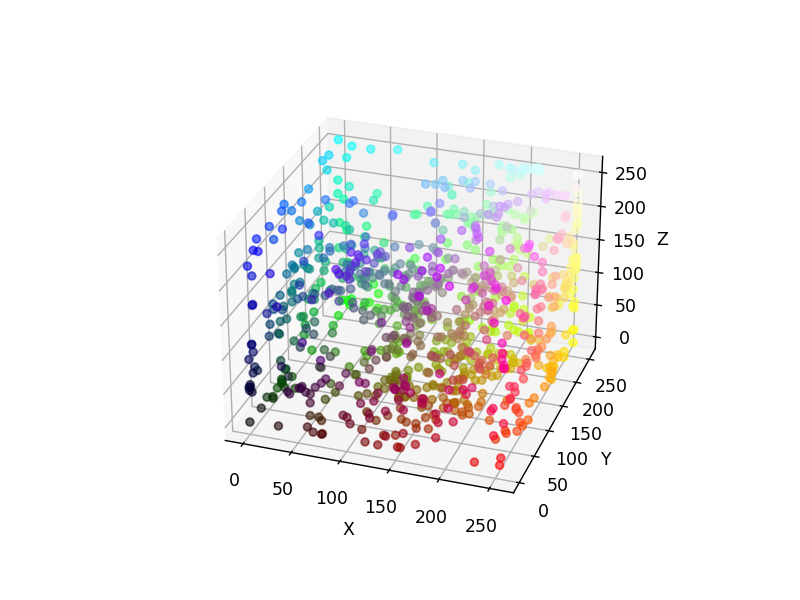

In [28]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

color_matrix=dataframe_color.iloc[:,2:5].values
col = dataframe_color['hex'].values
# Crea i dati per il grafico di dispersione 3D
x2 = color_matrix[:,0]
y2 = color_matrix[:,1]
z2 = color_matrix[:,2]

# Crea il grafico di dispersione 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2, y2, z2, c=col, alpha=0.6)

# Imposta le etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostra il grafico
plt.show()

Proviamo ora ad utilizzare un po' di algebra vettoriale sui colori

Dimostriamo che la distanza da "rosso" a "verde" è maggiore della distanza da "rosso" a "rosa":

In [29]:
np.sqrt(np.dot(colors['red']-colors['green'],colors['red']-colors['green']))

273.70787347096905

Utilizzo una funzione più comoda

In [30]:
np.linalg.norm(colors['red']- colors['green']) 

273.70787347096905

In [31]:
np.linalg.norm(colors['red']- colors['pink']) 

232.76812496559748

In [45]:
np.linalg.norm(colors['red']- colors['green']) > np.linalg.norm(colors['red']- colors['pink']) 

True

### Trovare l'oggetto più vicino

Proprio come volevamo trovare l'animale che più si avvicinava a un punto arbitrario nello spazio carineria/dimensione, vorremmo trovare il nome del colore più vicino a un punto arbitrario nello spazio RGB. Il modo più semplice per trovare l'elemento più vicino a un vettore arbitrario è semplicemente trovare la distanza tra il vettore di destinazione e ogni elemento nello spazio, a turno, quindi ordinare l'elenco dal più vicino al più lontano. La funzione `closest()` qui sotto fa proprio questo. Per impostazione predefinita, restituisce un elenco dei dieci elementi più vicini al vettore specificato.

> Nota: il calcolo dei "vicini più vicini" in questo modo va bene per gli esempi in questo quaderno, ma ingestibile lento per spazi vettoriali di qualsiasi dimensione apprezzabile. Man mano che il tuo spazio vettoriale cresce, vorrai passare a una soluzione più veloce, come [kdtree](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree) di SciPy .html) o [Annoy](https://pypi.python.org/pypi/annoy).

In [32]:
points = dataframe_color.iloc[:,2:5].values
points

array([[172, 194, 217],
       [ 86, 174,  87],
       [178, 153, 110],
       ...,
       [  3,  67, 223],
       [ 21, 176,  26],
       [126,  30, 156]])

In [37]:
# funzione che ci restituisce gli n vettori più vicini ad un vettore dato
def closest_indices(ref_vector, vectors,n):
    distances = np.sqrt(np.sum((vectors - ref_vector)**2, axis=1))
    # ordiniamo gli indici dei punti in base alla distanza dal vettore di riferimento e prendiamo i primi 10
    closest_indices = np.argsort(distances)[:n]
    return closest_indices

In [39]:
color_matrix

array([[172, 194, 217],
       [ 86, 174,  87],
       [178, 153, 110],
       ...,
       [  3,  67, 223],
       [ 21, 176,  26],
       [126,  30, 156]])

In [40]:
colors['red']

array([229,   0,   0])

In [36]:
color_matrix=dataframe_color.iloc[:,2:5].values
ref_vector = colors['red']
k_nearest= 10

cind = closest_indices(ref_vector,color_matrix,k_nearest)

# stampiamo i punti più vicini
print(cind)

[943 479 806 335 535 768 574 428 435 271]


In [49]:
dataframe_color.iloc[cind,:]

,color,hex,R,G,B
943,red,#e50000,229,0,0
479,fire engine red,#fe0002,254,0,2
806,bright red,#ff000d,255,0,13
335,tomato red,#ec2d01,236,45,1
535,cherry red,#f7022a,247,2,42
768,scarlet,#be0119,190,1,25
574,vermillion,#f4320c,244,50,12
428,orangish red,#f43605,244,54,5
435,cherry,#cf0234,207,2,52
271,lipstick red,#c0022f,192,2,47


A questo punto possiamo chiederci quali sono i colori più vicini a (10,50,150)

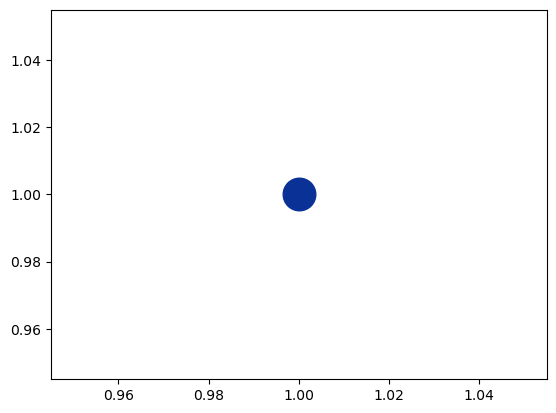

In [41]:
from matplotlib.colors import to_hex
%matplotlib inline

ref_vector=np.array([10,50,150]) # colore scelto da noi
ref_color = 1/255.0*ref_vector # specifica RGB del colore scalato di 255.0
plt.scatter(1, 1, s=550,color=to_hex(ref_color))


In [42]:
k_nearest = 20
cind = closest_indices(ref_vector,color_matrix,k_nearest)
extraction = dataframe_color.iloc[cind,:]
extraction

,color,hex,R,G,B
587,darkish blue,#014182,1,65,130
237,royal,#0c1793,12,23,147
794,cobalt,#1e488f,30,72,143
116,sapphire,#2138ab,33,56,171
256,twilight blue,#0a437a,10,67,122
506,light navy,#155084,21,80,132
579,prussian blue,#004577,0,69,119
165,deep sea blue,#015482,1,84,130
749,cobalt blue,#030aa7,3,10,167
102,dusk blue,#26538d,38,83,141


darkish blue
royal
cobalt
sapphire
twilight blue
light navy
prussian blue
deep sea blue
cobalt blue
dusk blue
marine blue
royal blue
peacock blue
marine
light navy blue
blue blue
dark royal blue
deep blue
indigo blue
ultramarine


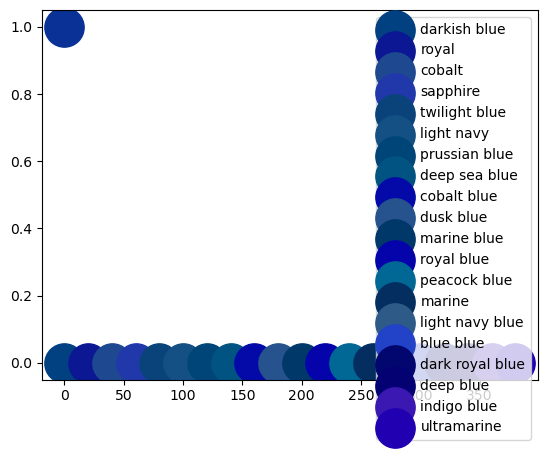

In [43]:
x=0;y=0
%matplotlib inline

plt.scatter(x, y+1, s=800, color=to_hex(ref_color))

for i in range(0,extraction.shape[0]):
    colorname = extraction.iloc[i,0]
    rgb_vect=extraction.iloc[i,1]  # estrae i codici rgb
    print(colorname)
    plt.scatter(x, y, s=800,c=rgb_vect, label=colorname)
    x=x+20
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


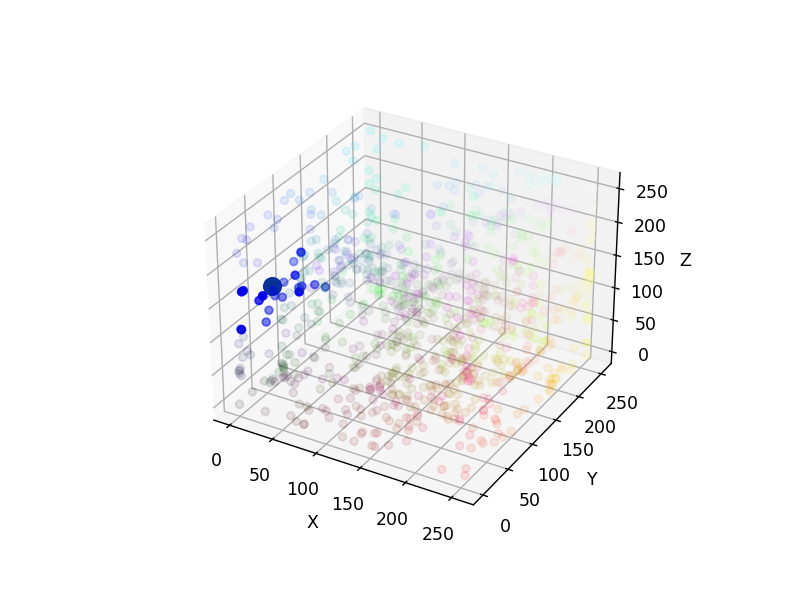

In [44]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
col = dataframe_color['hex'].values

# Crea i dati per il grafico di dispersione 3D
x1 = extraction.iloc[:,2].values
y1 = extraction.iloc[:,3].values
z1 = extraction.iloc[:,4].values

x2 = color_matrix[:,0]
y2 = color_matrix[:,1]
z2 = color_matrix[:,2]

# Crea il grafico di dispersione 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2, y2, z2, c=col, alpha=0.1)
ax.scatter(x1, y1, z1, color='blue')
ax.scatter(ref_vector[0], ref_vector[1], ref_vector[2], s=100, color=to_hex(ref_color))



# Imposta le etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostra il grafico
plt.show()


# ORA PROVA TU
- Plotta i 15 colori più vicini all'arancione
- Scegli un colore rgb (r,g,b) e trova i 15 colori più vicini

### Magia dei colori

La parte magica della rappresentazione delle parole come vettori è che le operazioni vettoriali che abbiamo definito in precedenza sembrano operare sul linguaggio nello stesso modo in cui operano sui numeri. 

Ad esempio, se troviamo la parola più vicina al vettore risultante dalla sottrazione di "rosso" da "viola", otteniamo una serie di colori "blu":

In [49]:
diff1 = colors['purple'] - colors['red']

In [50]:
k_nearest=10
cind2 = closest_indices(diff1,color_matrix,k_nearest)
dataframe_color.iloc[cind2,:]

,color,hex,R,G,B
749,cobalt blue,#030aa7,3,10,167
916,royal blue,#0504aa,5,4,170
587,darkish blue,#014182,1,65,130
650,true blue,#010fcc,1,15,204
237,royal,#0c1793,12,23,147
579,prussian blue,#004577,0,69,119
144,dark royal blue,#02066f,2,6,111
854,deep blue,#040273,4,2,115
673,marine blue,#01386a,1,56,106
165,deep sea blue,#015482,1,84,130


Ciò corrisponde alla nostra intuizione sui colori RGB, ovvero che il viola è una combinazione di rosso e blu. Togli il rosso e il blu è tutto ciò che ti rimane.

Puoi fare qualcosa di simile con l'addizione. Cos'è il blu più il verde?

In [51]:
k_nearest=10
cind2 = closest_indices(colors['blue']+colors['green'],color_matrix,k_nearest)
dataframe_color.iloc[cind2,:]

,color,hex,R,G,B
570,bright turquoise,#0ffef9,15,254,249
519,bright light blue,#26f7fd,38,247,253
502,bright aqua,#0bf9ea,11,249,234
926,cyan,#00ffff,0,255,255
692,neon blue,#04d9ff,4,217,255
774,aqua blue,#02d8e9,2,216,233
217,bright cyan,#41fdfe,65,253,254
493,bright sky blue,#02ccfe,2,204,254
925,aqua,#13eac9,19,234,201
657,bright teal,#01f9c6,1,249,198


Esatto, è qualcosa come il turchese o il ciano! 

E se calcoliamo la MEDIA del bianco e nero? Com'era prevedibile, otteniamo il grigio:

In [52]:
average = 1/2*(colors['black']+colors['white'])
average

array([127.5, 127.5, 127.5])

In [53]:
average

array([127.5, 127.5, 127.5])

In [54]:
k_nearest=10
cind2 = closest_indices(average,color_matrix,k_nearest)
dataframe_color.iloc[cind2,:]

,color,hex,R,G,B
445,medium grey,#7d7f7c,125,127,124
637,purple grey,#866f85,134,111,133
576,steel grey,#6f828a,111,130,138
63,battleship grey,#6b7c85,107,124,133
699,grey purple,#826d8c,130,109,140
539,purplish grey,#7a687f,122,104,127
752,greyish purple,#887191,136,113,145
629,steel,#738595,115,133,149
437,warm grey,#978a84,151,138,132
649,green grey,#77926f,119,146,111


Proprio come con l'esempio tarantola/criceto della sezione precedente, possiamo usare i vettori di colore per ragionare sulle relazioni tra i colori. 

Nella cella in basso, trovare la differenza tra "rosa" e "rosso" e poi aggiungerla a "blu" sembra darci un elenco di colori che stanno al blu come il rosa sta al rosso (cioè una tonalità leggermente più chiara, meno satura ):

In [55]:
dist3 = np.linalg.norm(colors['red']-colors['pink'])
dist3

232.76812496559748

In [57]:
distances = np.sqrt(np.sum((color_matrix - colors['red'])**2, axis=1))
dataframe1 = dataframe_color
dataframe1['distances']=distances
dataframe1[(dataframe1['distances']>(dist3-1))&(dataframe1['distances']<(dist3+1))]

,color,hex,R,G,B,distances
36,deep lilac,#966ebd,150,110,189,232.512365
67,sickly yellow,#d0e429,208,228,41,232.606965
453,dark navy blue,#00022e,0,2,46,233.582962
461,pink/purple,#ef1de7,239,29,231,233.027895
513,dusty green,#76a973,118,169,115,232.609114
525,faded pink,#de9dac,222,157,172,232.984978
549,bright magenta,#ff08e8,255,8,232,233.589383
554,darkish green,#287c37,40,124,55,232.641355
616,dark forest green,#002d04,0,45,4,233.413796
761,pine green,#0a481e,10,72,30,232.475805


In [58]:
distances = np.sqrt(np.sum((color_matrix - colors['blue'])**2, axis=1))
dataframe1 = dataframe_color
dataframe1['distances']=distances
dataframe1[(dataframe1['distances']>(dist3-1))&(dataframe1['distances']<(dist3+1))]

,color,hex,R,G,B,distances
12,dark grass green,#388004,56,128,4,233.433074
121,very dark brown,#1d0200,29,2,0,233.730614
152,true green,#089404,8,148,4,233.552992
187,sap green,#5c8b15,92,139,21,232.183117
208,claret,#680018,104,0,24,233.004292
263,dusty red,#b9484e,185,72,78,232.753088
296,light periwinkle,#c1c6fc,193,198,252,232.598366
614,dark maroon,#3c0008,60,0,8,232.299376
691,wine red,#7b0323,123,3,35,232.034480
725,clay,#b66a50,182,106,80,232.402668


darkish blue
royal
cobalt
sapphire
twilight blue
light navy
prussian blue
deep sea blue
cobalt blue
dusk blue
marine blue
royal blue
peacock blue
marine
light navy blue
blue blue
dark royal blue
deep blue
indigo blue
ultramarine


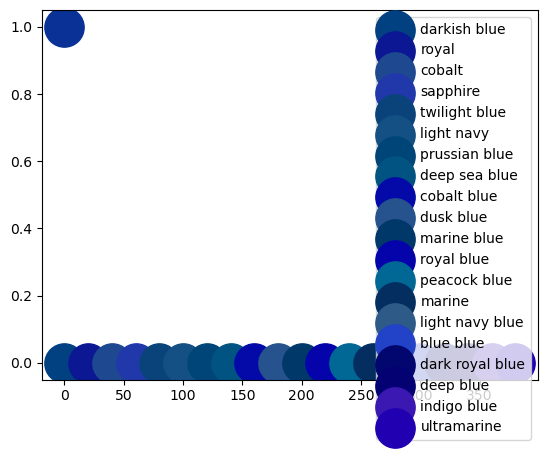

In [59]:
x=0;y=0
%matplotlib inline

plt.scatter(x, y+1, s=800, color=to_hex(ref_color))

for i in range(0,extraction.shape[0]):
    colorname = extraction.iloc[i,0]
    rgb_vect=extraction.iloc[i,1]  # estrae i codici rgb
    print(colorname)
    plt.scatter(x, y, s=800,c=rgb_vect, label=colorname)
    x=x+20
plt.legend()
plt.show()

### Interlude: A Love Poem That Loses Its Way

In [137]:
import random
red = colors['red']
blue = colors['blue']
for i in range(14):
    ind1 = closest_indices(red,color_matrix,10)
    rednames = dataframe_color.iloc[ind1,:]['color'].values
    ind2 = closest_indices(blue,color_matrix,10)
    bluenames = dataframe_color.iloc[ind2,:]['color'].values
   # bluenames = closest(colors, blue)
    print ("Roses are " + rednames[0] + ", violets are " + bluenames[0])
    red = colors[random.choice(rednames[1:])]
    blue = colors[random.choice(bluenames[1:])]

Roses are red, violets are blue
Roses are tomato red, violets are vivid blue
Roses are orangered, violets are rich blue
Roses are orange red, violets are vivid blue
Roses are vermillion, violets are azul
Roses are orangish red, violets are clear blue
Roses are reddish orange, violets are dodger blue
Roses are red orange, violets are dark sky blue
Roses are orangey red, violets are cornflower
Roses are reddish orange, violets are lightish blue
Roses are tomato, violets are warm blue
Roses are orangish red, violets are blurple
Roses are blood orange, violets are blue purple
Roses are vermillion, violets are violet blue


### Fare brutte discipline umanistiche digitali con i vettori di colore

Con gli strumenti di cui sopra in mano, possiamo iniziare a utilizzare la nostra conoscenza vettorializzata del linguaggio per fini accademici. Nell'esempio seguente, calcolerò il colore medio di *Dracula* di Bram Stoker.

(Prima di procedere, assicurati di [scaricare il file di testo dal Progetto Gutenberg](http://www.gutenberg.org/cache/epub/345/pg345.txt) e posizionarlo nella stessa directory di questo taccuino.)

Innanzitutto, caricheremo [spaCy](https://spacy.io/):

In [ ]:
# ! pip install spacy

In [60]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [47]:
import urllib.request

url = "https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/pg345.txt"  # URL del file da scaricare
filename = "pg345.txt"  # Nome del file in locale
urllib.request.urlretrieve(url, filename)  # Scarica il file e salva in locale

('pg345.txt', <http.client.HTTPMessage at 0x7fa2c31b6a30>)

In [48]:
doc = nlp(open("./pg345.txt", encoding="utf8").read())

In [61]:
doc

﻿The Project Gutenberg eBook of Dracula, by Bram Stoker

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Dracula

Author: Bram Stoker

Release Date: October, 1995 [eBook #345]
[Most recently updated: March 27, 2023]

Language: English


Produced by: Chuck Greif and the Online Distributed Proofreading Team

*** START OF THE PROJECT GUTENBERG EBOOK DRACULA ***




                                DRACULA

                                  _by_

                              Bram Stoker

                        [Illustration: colophon]

                                NEW YORK

                

Cerchiamo nel testo le parole corrispondenti ai colori. Se le troviamo le mettiamo in una lista

In [161]:
a = [word.lower_ for word in doc if word.lower_ in colors]

In [162]:
a

['red',
 'maize',
 'white',
 'white',
 'white',
 'leather',
 'black',
 'black',
 'dark',
 'twilight',
 'golden',
 'white',
 'white',
 'midnight',
 'rose',
 'grey',
 'red',
 'wine',
 'golden',
 'orange',
 'green',
 'green',
 'apple',
 'plum',
 'pear',
 'cherry',
 'green',
 'grass',
 'green',
 'pine',
 'green',
 'rose',
 'forest',
 'blue',
 'purple',
 'green',
 'brown',
 'grass',
 'rose',
 'white',
 'pink',
 'white',
 'silver',
 'green',
 'white',
 'twilight',
 'dark',
 'pine',
 'dark',
 'pine',
 'dark',
 'grey',
 'leather',
 'sea',
 'dark',
 'dark',
 'rose',
 'white',
 'sandy',
 'white',
 'black',
 'brown',
 'black',
 'red',
 'red',
 'white',
 'ivory',
 'steel',
 'plum',
 'midnight',
 'midnight',
 'white',
 'blue',
 'blue',
 'blue',
 'black',
 'pine',
 'white',
 'red',
 'black',
 'sky',
 'dark',
 'steel',
 'stone',
 'stone',
 'dark',
 'dark',
 'white',
 'black',
 'silver',
 'stone',
 'ice',
 'stone',
 'white',
 'pale',
 'white',
 'rose',
 'sea',
 'coffee',
 'gold',
 'red',
 'blue',
 'na

In [ ]:
# se voglio vedere i nomi estratti
# a = [word.lower_ for word in doc if word.lower_ in colors]

In [62]:
# use word.lower_ to normalize case
drac_colors = [colors[word.lower_] for word in doc if word.lower_ in colors]
drac_colors

[array([229,   0,   0]),
 array([244, 208,  84]),
 array([255, 255, 255]),
 array([255, 255, 255]),
 array([255, 255, 255]),
 array([172, 116,  52]),
 array([0, 0, 0]),
 array([0, 0, 0]),
 array([27, 36, 49]),
 array([ 78,  81, 139]),
 array([245, 191,   3]),
 array([255, 255, 255]),
 array([255, 255, 255]),
 array([ 3,  1, 45]),
 array([207,  98, 117]),
 array([146, 149, 145]),
 array([229,   0,   0]),
 array([128,   1,  63]),
 array([245, 191,   3]),
 array([249, 115,   6]),
 array([ 21, 176,  26]),
 array([ 21, 176,  26]),
 array([110, 203,  60]),
 array([88, 15, 65]),
 array([203, 248,  95]),
 array([207,   2,  52]),
 array([ 21, 176,  26]),
 array([ 92, 172,  45]),
 array([ 21, 176,  26]),
 array([43, 93, 52]),
 array([ 21, 176,  26]),
 array([207,  98, 117]),
 array([11, 85,  9]),
 array([  3,  67, 223]),
 array([126,  30, 156]),
 array([ 21, 176,  26]),
 array([101,  55,   0]),
 array([ 92, 172,  45]),
 array([207,  98, 117]),
 array([255, 255, 255]),
 array([255, 129, 192]),
 a

Calcolo il colore medio

In [63]:
total = np.zeros(3)
for colorl in drac_colors:
    total = total + colorl
    
avg_color = 1/(len(drac_colors))*total
print (avg_color)

[147.44839068 113.65371809 100.13540511]


Ora, passeremo il vettore di colore medio alla funzione `closest()`, ottenendo... beh, è solo una poltiglia marrone, che è un po' quello che ti aspetteresti sommando un mucchio di colori insieme, volenti o nolenti.

In [64]:
k_nearest = 5
cind4 = closest_indices(avg_color,color_matrix,k_nearest)
dataframe_color.iloc[cind4,:]


,color,hex,R,G,B,distances
52,reddish grey,#997570,153,117,112,193.186438
537,brownish grey,#86775f,134,119,95,190.391701
719,brownish,#9c6d57,156,109,87,208.971290
273,brown grey,#8d8468,141,132,104,193.468344
550,mocha,#9d7651,157,118,81,215.594527


D'altra parte, ecco cosa otteniamo quando calcoliamo la media dei colori del classico *The Yellow Wallpaper* di Charlotte Perkins Gilman. ([Scarica da qui](http://www.gutenberg.org/cache/epub/1952/pg1952.txt) e salva nella stessa directory di questo taccuino se vuoi seguire.) Il risultato riflette decisamente il contenuto della storia, quindi forse siamo a qualcosa qui.

In [65]:
import urllib.request

url = "https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/pg1952.txt"  # URL del file da scaricare
filename = "pg1952.txt"  # Nome del file in locale
urllib.request.urlretrieve(url, filename)  # Scarica il file e salva in locale

('pg1952.txt', <http.client.HTTPMessage at 0x7fa2c2e54100>)

In [66]:
doc2 = nlp(open("pg1952.txt", encoding="utf8").read())

In [68]:
a = [word.lower_ for word in doc2 if word.lower_ in colors]

In [69]:
a

['yellow',
 'yellow',
 'yellow',
 'yellow',
 'grape',
 'yellow',
 'orange',
 'velvet',
 'wine',
 'twilight',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'white',
 'green',
 'yellow',
 'leaf',
 'leaf',
 'yellow',
 'yellow',
 'swamp']

In [70]:
# use word.lower_ to normalize case
drac_colors1 = [colors[word.lower_] for word in doc2 if word.lower_ in colors]
drac_colors1

[array([255, 255,  20]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([108,  52,  97]),
 array([255, 255,  20]),
 array([249, 115,   6]),
 array([117,   8,  81]),
 array([128,   1,  63]),
 array([ 78,  81, 139]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([255, 255, 255]),
 array([ 21, 176,  26]),
 array([255, 255,  20]),
 array([113, 170,  52]),
 array([113, 170,  52]),
 array([255, 255,  20]),
 array([255, 255,  20]),
 array([105, 131,  57])]

In [71]:
total = np.zeros(3)
for colorl in drac_colors1:
    total = total + colorl
    
avg_color = 1/(len(drac_colors1))*total
print (avg_color)

[202.375      197.04166667  46.16666667]


In [72]:
k_nearest = 5
cind4 = closest_indices(avg_color,color_matrix,k_nearest)
dataframe_color.iloc[cind4,:]

,color,hex,R,G,B,distances
67,sickly yellow,#d0e429,208,228,41,317.915083
216,piss yellow,#ddd618,221,214,24,329.748389
664,puke yellow,#c2be0e,194,190,14,308.692404
332,vomit yellow,#c7c10c,199,193,12,314.345351
745,dirty yellow,#cdc50a,205,197,10,321.049840


Exercise for the reader: Use the vector arithmetic functions to rewrite a text, making it...

* more blue (i.e., add `colors['blue']` to each occurrence of a color word); or
* more light (i.e., add `colors['white']` to each occurrence of a color word); or
* darker (i.e., attenuate each color. You might need to write a vector multiplication function to do this one right.)

## Distributional Semantics

Nella sezione precedente, gli esempi sono interessanti per un semplice fatto: i colori che consideriamo simili sono "più vicini" tra loro nello spazio vettoriale RGB. Nel nostro spazio vettoriale dei colori, o nel nostro spazio degli animali, puoi pensare alle parole identificate da vettori vicini l'uno all'altro come *sinonimi*, nel senso che "significano" la stessa cosa. Sono anche, per molti versi, *funzionalmente identici*. 

Se estendiamo questa similitudine alla scrittura, per es. pensiamo ad un motore di ricerca, se qualcuno cerca "mauve trousers" (pantaloni color malva), probabilmente potrebbe andare bene anche mostrare i risultati come di seguito proposto:

In [73]:
ind5 = closest_indices(colors['mauve'], color_matrix,10)
for cname in dataframe_color.iloc[ind5,0].values:
    print (cname + " trouser")

mauve trouser
dusty rose trouser
dusky rose trouser
brownish pink trouser
old pink trouser
reddish grey trouser
dirty pink trouser
old rose trouser
light plum trouser
ugly pink trouser


mauve
dusty rose
dusky rose
brownish pink
old pink
reddish grey
dirty pink
old rose
light plum
ugly pink


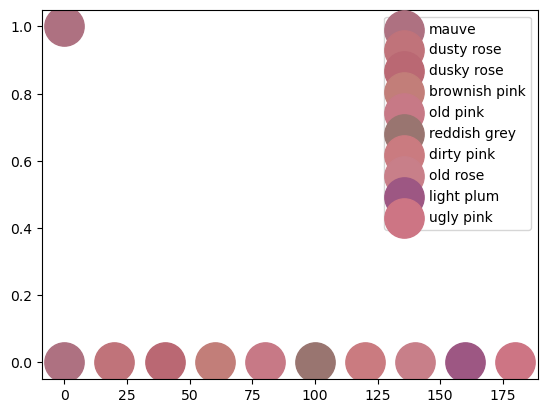

In [74]:
extraction = dataframe_color.iloc[ind5,:]
x=0;y=0
%matplotlib inline
ref_vector = colors['mauve']
ref_color = 1/255.0*ref_vector
plt.scatter(x, y+1, s=800, color=to_hex(ref_color))

for i in range(0,extraction.shape[0]):
    colorname = extraction.iloc[i,0]
    rgb_vect=extraction.iloc[i,1]  # estrae i codici rgb
    print(colorname)
    plt.scatter(x, y, s=800,c=rgb_vect, label=colorname)
    x=x+20

plt.legend()
plt.show()

Va tutto bene per le parole che si riferiscono ai colori, che intuitivamente sembrano esistere in un continuum multidimensionale relativo alla percezione. Ma che dire delle... parole arbitrarie? È possibile creare uno spazio vettoriale per tutte le parole inglesi che abbia la stessa proprietà "più vicino nello spazio significa più vicino nel significato"?

Per rispondere a questa domanda, dobbiamo fare un passo indietro e porci la domanda: cosa significa *significato*? 

Nessuno lo sa veramente, ma una teoria diffusa tra linguisti computazionali, informatici e altri ricercatori che creano motori di ricerca è l'[Ipotesi distributiva](https://en.wikipedia.org/wiki/Distributional_semantics), che afferma che:

     Gli elementi linguistici con distribuzioni simili hanno significati simili.
    
Ciò che si intende per "distribuzioni simili" è *contesti simili*. Prendiamo ad esempio le seguenti frasi:

    It was really cold yesterday.
    It will be really warm today, though.
    It'll be really hot tomorrow!
    Will it be really cool Tuesday?
    
Secondo l'ipotesi distributiva, le parole "cold", "warm", "hot" e "cool" devono essere correlate in qualche modo (cioè avere un significato vicino) perché ricorrono in un contesto simile, cioè tra la parola "really" e una parola che indica un giorno particolare. (Allo stesso modo, le parole "yesterday", "today", "tomorrow" e "tuesday" devono essere correlate, poiché ricorrono nel contesto di una parola che indica una temperatura.)

In altre parole, secondo l'ipotesi distributiva, il significato di una parola è solo un lungo elenco di tutti i contesti in cui ricorre. Due parole hanno un significato più vicino se condividono i contesti.

## Vettori di parole per mezzo del conteggio dei contesti

Quindi, come trasformiamo questa intuizione dell'ipotesi distributiva in un sistema per creare vettori generici che catturino il significato delle parole? E se creassimo un foglio di calcolo *davvero grande* che avesse una colonna per ogni contesto per ogni parola in un dato testo sorgente. 

Usiamo un piccolo testo di partenza per cominciare, come questo estratto da Dickens:

     It was the best of times, it was the worst of times.

Tale foglio di calcolo potrebbe essere simile a questo:

![dickens contexts](http://static.decontextualize.com/snaps/best-of-times.png)

Il foglio di calcolo ha una colonna per ogni possibile contesto e una riga per ogni parola. I valori in ogni cella corrispondono a quante volte la parola ricorre nel contesto dato. I numeri nelle colonne costituiscono il vettore di quella parola, cioè il vettore per la parola "of" è

     [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
    
Poiché ci sono dieci possibili contesti, questo è uno spazio a dieci dimensioni! Potrebbe sembrare strano pensarci, ma puoi fare l'aritmetica vettoriale su vettori con dieci dimensioni con la stessa facilità con cui puoi farlo su vettori con due o tre dimensioni, e potresti usare la stessa formula di distanza che abbiamo definito in precedenza per ottenere informazioni utili su quali vettori in questo spazio sono simili tra loro. In particolare, i vettori per "best" e "worst" sono in realtà gli stessi (una distanza pari a zero), poiché si verificano solo nello stesso contesto (`the ___ of`):

     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    
Naturalmente, il modo convenzionale di pensare a "best" e "worst" è che sono *contrari*, non *sinonimi*. Ma sono anche chiaramente due parole dello stesso tipo, con significati correlati (per opposizione), un fatto che viene colto da questo modello distributivo.

### Contesti e dimensionalità

Naturalmente, in un corpus di dimensioni ragionevoli, ci saranno molte migliaia se non molti milioni di contesti possibili. È già abbastanza difficile lavorare con uno spazio vettoriale di dieci dimensioni, per non parlare di uno spazio vettoriale di un milione di dimensioni! Si può dimostrare, tuttavia, che molte delle dimensioni finiscono per essere superflue e possono essere eliminate o combinate con altre dimensioni senza influire in modo significativo sul potere predittivo dei vettori risultanti. Il processo di eliminazione delle dimensioni superflue in uno spazio vettoriale è chiamato [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) e la maggior parte delle implementazioni di vettori di parole basati sul conteggio fanno uso di questa tecnica in modo che lo spazio vettoriale risultante abbia un numero ragionevole di dimensioni (diciamo, 100-300, a seconda del corpus e dell'applicazione).

La domanda su come identificare un "contesto" è di per sé molto difficile da rispondere. Nell'esempio che abbiamo fatto sopra, un "contesto" è solo la parola che precede e la parola che segue, tuttavia, si potrebbe volere un contesto con una "finestra" più grande (ad esempio, due parole prima e dopo) o una finestra non contigua (salta una parola prima e dopo la parola data). Potremmo escludere alcune parole "funzionali" come "the" e "of" quando determiniamo il contesto di una parola, oppure potremmo [lemmatizzare](https://en.wikipedia.org/wiki/Lemmatisation) le parole prima di iniziare l'analisi, in modo che due occorrenze con diverse "forme" della stessa parola contino come lo stesso contesto. 
Quale sia la procedura migliore da utilizzare è una domanda ancora aperta. Ad oggi esistono diverse implementazioni di procedure per la creazione di vettori di parole basati sul conteggio e vengono prese strategie diverse.

### GloVe Vectors

Ma nel nostro caso non dobbiamo creare i vettori di parole da zero! Molti ricercatori hanno creato database scaricabili di vettori pre-addestrati. Uno di questi progetti è [Global Vector for Word Representation (GloVe)] di Stanford (https://nlp.stanford.edu/projects/glove/). Questi vettori a 300 dimensioni sono inclusi in spaCy e sono i vettori che useremo per il resto di questa lezione

## Vettori di parole in spaCy

Useremo i vettori GloVe forniti con spaCy per analizzare e manipolare in modo creativo il testo di *Dracula* di Bram Stoker.

In [5]:
from __future__ import unicode_literals
import spacy


ModuleNotFoundError: No module named 'spacy'

In [76]:
# python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")


In [77]:
doc = nlp(open("pg345.txt", encoding="utf8").read())


e la cella sottostante crea un elenco di parole univoche (o token) nel testo, come un elenco di stringhe.

In [78]:
tokens = list(set([w.text for w in doc if w.is_alpha]))

Il metodo is_alpha() è un metodo della classe spacy.tokens.Token della libreria Spacy per il linguaggio naturale in Python. Questo metodo restituisce True se il token rappresenta una parola composta solo da caratteri alfabetici (lettere), altrimenti restituisce False.

Ad esempio, se si ha un oggetto Token che rappresenta la parola "Hello", il metodo is_alpha() restituirà True in quanto la parola è composta solo da lettere dell'alfabeto. Se invece il token rappresenta una parola contenente anche caratteri numerici o di punteggiatura, il metodo is_alpha() restituirà False.

In [193]:
len(tokens)

10247

In [79]:
tokens

['cherry',
 'befooling',
 'stature',
 'astray',
 'regulating',
 'projecting',
 'pouring',
 'hearted',
 'wearied',
 'VALLEY',
 'teeming',
 'Having',
 'conductor',
 'renewed',
 'although',
 'jumping',
 'curtainless',
 'particulari',
 'trailing',
 'Paterson',
 'Get',
 'hints',
 'frisked',
 'laudanum',
 'Street',
 'Judgment',
 'botany',
 'Are',
 'Lowrey',
 'breathlessly',
 'marvellous',
 'balm',
 'trick',
 'paucity',
 'sojourn',
 'amidst',
 'lean',
 'During',
 'cicatrised',
 'tested',
 'wit',
 'dated',
 'crimson',
 'hypnotism',
 'threatening',
 'haunted',
 'smelled',
 'poles',
 'plumbing',
 'nineteenth',
 'history',
 'sights',
 'befallen',
 'flood',
 'sanity',
 'stripped',
 'elapsed',
 'The',
 'pill',
 'stream',
 'famished',
 'NEGLIGENCE',
 'forceful',
 'VII',
 'gallopin',
 'owners',
 'hirritated',
 'scowled',
 'Kukri',
 'Donations',
 'gums',
 'ditherin',
 'analysed',
 'hitherto',
 'pleasantly',
 'gusto',
 'glass',
 'reef',
 'shattered',
 'roar',
 'amuse',
 'infallibly',
 'hetman',
 'aquil

Possiamo vedere il vettore corrispondente di qualsiasi parola nel vocabolario di spaCy usando l'attributo `vocab`, in questo modo:

In [80]:
nlp.vocab['cheese'].vector

array([ 1.3884e+00, -1.3481e+00, -1.7638e+00, -3.2299e-01,  2.8968e+00,
       -3.4742e+00,  1.5614e+00,  4.1019e+00, -2.3339e+00,  7.7066e-01,
        5.4667e+00, -4.3539e+00,  2.1411e+00,  1.0337e+00,  2.1333e+00,
       -5.2507e+00, -8.4292e-01,  1.6601e+00,  8.0711e-01, -1.3815e+00,
       -3.0533e+00,  1.3261e+00, -1.5997e+00,  9.7612e-01, -4.8395e+00,
       -1.1163e+00, -5.6145e+00,  2.0262e+00, -1.7511e+00, -3.1134e+00,
        1.3560e+00, -6.7027e-01, -9.2217e-02, -1.5939e+00, -1.1572e+00,
       -3.2397e+00,  2.8394e+00,  1.9167e+00, -1.8530e+00,  9.4867e-01,
        7.9217e-01,  2.8105e-01,  2.3105e+00, -2.0119e+00,  3.6931e+00,
       -2.1588e+00,  9.3177e-01,  2.4037e-01, -1.9010e+00,  5.0660e-01,
        1.3864e-01,  3.2558e-01, -7.1408e-01, -1.5416e+00, -1.7270e-01,
       -3.7842e+00, -8.8674e-01,  3.5418e+00,  5.5733e+00,  2.0573e+00,
        3.4798e+00, -1.4878e+00,  3.5792e+00,  1.6799e+00,  1.9810e+00,
        4.5659e-01, -4.8671e+00, -1.0939e+00,  1.8729e+00,  3.80

Notiamo che la dimensione dello spazio vettoriale è 300

In [81]:
nlp.vocab['cheese'].vector.shape

(300,)

Definiamo per comodità la seguente funzione che restituisce il vettore di una data stringa dal vocabolario di spaCy:

In [82]:
def vec(s):
    return nlp.vocab[s].vector

In [83]:
vec('cheese')

array([ 1.3884e+00, -1.3481e+00, -1.7638e+00, -3.2299e-01,  2.8968e+00,
       -3.4742e+00,  1.5614e+00,  4.1019e+00, -2.3339e+00,  7.7066e-01,
        5.4667e+00, -4.3539e+00,  2.1411e+00,  1.0337e+00,  2.1333e+00,
       -5.2507e+00, -8.4292e-01,  1.6601e+00,  8.0711e-01, -1.3815e+00,
       -3.0533e+00,  1.3261e+00, -1.5997e+00,  9.7612e-01, -4.8395e+00,
       -1.1163e+00, -5.6145e+00,  2.0262e+00, -1.7511e+00, -3.1134e+00,
        1.3560e+00, -6.7027e-01, -9.2217e-02, -1.5939e+00, -1.1572e+00,
       -3.2397e+00,  2.8394e+00,  1.9167e+00, -1.8530e+00,  9.4867e-01,
        7.9217e-01,  2.8105e-01,  2.3105e+00, -2.0119e+00,  3.6931e+00,
       -2.1588e+00,  9.3177e-01,  2.4037e-01, -1.9010e+00,  5.0660e-01,
        1.3864e-01,  3.2558e-01, -7.1408e-01, -1.5416e+00, -1.7270e-01,
       -3.7842e+00, -8.8674e-01,  3.5418e+00,  5.5733e+00,  2.0573e+00,
        3.4798e+00, -1.4878e+00,  3.5792e+00,  1.6799e+00,  1.9810e+00,
        4.5659e-01, -4.8671e+00, -1.0939e+00,  1.8729e+00,  3.80

### Somiglianza del coseno e ricerca dei "closest neighbors"
La cella sottostante definiamo la funzione `cosine()`, che restituisce la [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) di due vettori. La cosine similarity è un ulteriore modo per determinare quanto sono simili due vettori, che è più adatto agli spazi ad alta dimensione. [Vedi l'Enciclopedia delle distanze per ulteriori informazioni e ulteriori modi per determinare la somiglianza dei vettori.](http://www.uco.es/users/ma1fegan/Comunes/asignaturas/vision/Encyclopedia-of-distances-2009.pdf)
Il valore di similitudine così definito è compreso tra -1 e +1, dove -1 indica una corrispondenza esatta ma opposta e +1 indica due vettori uguali.



In [85]:
from numpy.linalg import norm

# cosine similarity
def cosine(v1, v2):
    if norm(v1) > 0 and norm(v2) > 0:
        return np.dot(v1, v2) / (norm(v1) * norm(v2))
    else:
        return 0.0

La cella seguente mostra che la cosine similarity tra "dog" e "puppy" è maggiore di quella tra "trouser" e "octopus", dimostrando così che i vettori funzionano come ci aspettiamo che funzionino:

In [89]:
cosine(vec('dog'), vec('puppy'))

0.8107668

In [90]:
cosine(vec('trousers'), vec('octopus'))

0.120662466

In [88]:
cosine(vec('dog'), vec('puppy')) > cosine(vec('trousers'), vec('octopus'))

True

La cella seguente definisce una funzione che scorre un elenco di token e restituisce il token il cui vettore è più simile a un dato vettore.

In [91]:
def spacy_closest(token_list, vec_to_check, n=10):
    return sorted(token_list,
                  key=lambda x: cosine(vec_to_check, vec(x)),
                  reverse=True)[:n]

Usando questa funzione, possiamo ottenere un elenco di sinonimi o parole più vicine nel significato (o nella distribuzione, a seconda di come la guardi) a qualsiasi parola arbitraria nel vocabolario di spaCy. Nell'esempio seguente, troviamo le parole in *Dracula* più vicine a "basket":

In [92]:
# what's the closest equivalent of basketball?
spacy_closest(tokens, vec("basketball"))

['tennis',
 'coach',
 'coachman',
 'junior',
 'leagues',
 'cricketing',
 'played',
 'allayed',
 'champing',
 'championing']

### Divertiamoci con spaCy, Dracula e aritmetica vettoriale

Ora possiamo iniziare a fare l'aritmetica vettoriale e trovare le parole più vicine ai vettori risultanti. Ad esempio, quale parola è più vicina al punto intermedio tra il giorno e la notte?

In [93]:
def meanv(coords):
    # assumes every item in coords has same length as item 0
    sumv = [0] * len(coords[0])
    for item in coords:
        for i in range(len(item)):
            sumv[i] += item[i]
    mean = [0] * len(sumv)
    for i in range(len(sumv)):
        mean[i] = float(sumv[i]) / len(coords)
    return mean

In [94]:
# halfway between day and night
spacy_closest(tokens, meanv([vec("day"), vec("night")]))

['day',
 'nightdress',
 'nightly',
 'nigh',
 'night',
 'nightingale',
 'morning',
 'mornin',
 'forenoon',
 'evening']

Le variazioni di "night" e "day" sono ancora le più vicine, ma otteniamo anche parole come "evening" e "morning", che sono davvero a metà strada tra il giorno e la notte!

Ecco le parole in _Dracula_ che più si avvicinano a "wine":

In [95]:
vec('wine')

array([-2.6949e+00, -6.3506e+00, -1.7509e+00,  3.5639e+00,  1.3923e+00,
       -3.8619e+00,  1.2643e+00,  6.0044e+00,  9.4837e-01,  4.8199e+00,
        3.5525e+00, -3.5312e+00,  3.1849e+00, -2.4966e+00,  1.3331e+00,
       -6.4942e+00, -2.2556e+00, -5.0331e+00,  5.0561e+00, -5.7410e+00,
        8.3393e-01,  6.3685e+00, -4.0293e+00,  1.4235e+00, -5.6559e+00,
        1.8118e+00, -5.6676e+00,  1.9517e+00,  2.4255e-02, -4.4346e+00,
        8.5200e+00, -2.4845e+00, -1.5821e+00, -2.5809e+00,  3.3870e+00,
        1.0779e+00, -2.4936e-02,  3.3328e+00,  2.1260e-02, -8.6298e-01,
       -3.6767e+00,  6.8099e+00,  7.8905e+00, -2.1443e+00,  4.1727e+00,
       -2.0926e+00,  8.1682e-01,  8.0055e-01,  4.3335e-01,  5.1043e-01,
       -5.8512e-01,  3.3036e+00, -7.2002e-03, -1.6166e+00,  8.6991e-02,
       -3.2256e+00, -3.1151e+00, -1.3086e+00,  2.2382e+00,  2.4172e+00,
        6.9887e-01,  6.9480e-01,  3.9152e+00, -3.8190e+00, -1.4193e+00,
        3.2188e+00, -6.7905e+00, -3.4690e+00,  1.4884e+00, -2.89

Se sottraiamo "alcohol" da "wine" e troviamo le parole più vicine al vettore risultante, ci resta semplicemente una cena deliziosa:

In [96]:
spacy_closest(tokens, (vec("wine")-vec("alcohol")))

['wine',
 'beer',
 'moonshine',
 'sherry',
 'exquisite',
 'pique',
 'Gin',
 'lofty',
 'splendidly',
 'splendid']

Le parole più vicine a "acqua":

In [97]:
spacy_closest(tokens, vec("water"))

['water',
 'waters',
 'watered',
 'waterway',
 'moisture',
 'liquid',
 'drain',
 'clog',
 'badinage',
 'speck']

Ma se aggiungi "frozen" ad "water", ottieni "ghiaccio":

In [98]:
spacy_closest(tokens, (vec("water")+vec("frozen")))

['water',
 'waters',
 'froze',
 'watered',
 'liquid',
 'waterway',
 'curdling',
 'steaming',
 'bubbling',
 'boiling']

Possiamo persino fare analogie! Ad esempio, le parole più simili a "grass":

In [65]:
spacy_closest(tokens, vec("grass"))

['grass',
 'grassy',
 'clumps',
 'shrubbery',
 'elms',
 'trees',
 'lawn',
 'greens',
 'foliage',
 'clump']

Se prendiamo la differenza di "blue" e "sky" e la aggiungiamo all'erba, ottieniamo la parola analoga ("green"):

In [66]:
# analogy: blue is to sky as X is to grass
blue_to_sky = (vec("blue")-vec("sky"))
spacy_closest(tokens, blue_to_sky+vec("grass"))

['grass',
 'grassy',
 'green',
 'browns',
 'brown',
 'leather',
 'yellowed',
 'yellow',
 'greens',
 'colophon']

## Sentence similarity

Per ottenere il vettore corrispondente ad una frase, facciamo semplicemente la media dei suoi vettori componenti, in questo modo:

In [99]:
def sentvec(s):
    sent = nlp(s)
    return meanv([w.vector for w in sent])

Troviamo la frase nel nostro file di testo che è più vicina nel "significato" a una frase di input arbitraria. Per prima cosa, otterremo l'elenco delle frasi:

In [100]:
sentences = list(doc.sents)

In [101]:
sentences

[﻿The Project Gutenberg eBook of Dracula, by Bram Stoker
 
 This eBook is for the use of anyone anywhere in the United States and
 most other parts of the world at no cost and with almost no restrictions
 whatsoever.,
 You may copy it, give it away or re-use it under the terms
 of the Project Gutenberg License included with this eBook or online at
 www.gutenberg.org.,
 If you are not located in the United States, you
 will have to check the laws of the country where you are located before
 using this eBook.
 ,
 Title: Dracula
 
 Author: Bram Stoker
 
 Release Date: October, 1995,
 [eBook #345],
 [Most recently updated:,
 March 27, 2023]
 
 Language: English
 
 
 Produced by: Chuck Greif and the Online Distributed Proofreading Team
 
 ***,
 START OF THE PROJECT GUTENBERG EBOOK DRACULA ***
 
 
 
 
                                 DRACULA
 
                                   _by_
 
                               Bram Stoker
 
                         ,
 [Illustration: colophon]
 
        

La funzione seguente prende un elenco di frasi da spaCy e le confronta con una frase di input, ordinandole in base alla somiglianza del coseno.

In [102]:
def spacy_closest_sent(space, input_str, n=10):
    input_vec = sentvec(input_str)
    return sorted(space,
                  key=lambda x: cosine(np.mean([w.vector for w in x], axis=0), input_vec),
                  reverse=True)[:n]

Ecco le frasi in *Dracula* più vicine nel significato a "My favorite food is strawberry ice cream.". (Sono presenti interruzioni di riga extra perché non le abbiamo eliminate quando abbiamo letto originariamente nel testo di origine.)

In [103]:
for sent in spacy_closest_sent(sentences, "My favorite food is strawberry ice cream."):
    print (sent.text)
    print ("---")

My revenge is
just begun!
---
My journey
is all mapped out, and my luggage ready.
---
My face is ghastly pale, and my throat pains
me.
---
It is destroying my nerve.
---
My mind is
made up.
---
Now my fear is this.
---
My arms are
hungry for you.
---
Nothing is too
small.
---
It is very cold, and only our warm furs keep
us comfortable.
---
My homicidal maniac is of a peculiar kind.
---


## Ulteriori risorse

* [Word2vec](https://en.wikipedia.org/wiki/Word2vec) è un'altra procedura per la produzione di vettori di parole che utilizza un approccio predittivo piuttosto che un approccio di conteggio del contesto. [Questo articolo](http://clic.cimec.unitn.it/marco/publications/acl2014/baroni-etal-countpredict-acl2014.pdf) confronta e contrappone i due approcci. (Spoiler: è una specie di lavaggio.)
* Se vuoi addestrare i tuoi vettori di parole su un particolare corpus, la popolare libreria Python [gensim](https://radimrehurek.com/gensim/) ha un'implementazione di Word2Vec che è relativamente facile da usare. [C'è un buon tutorial qui.](https://rare-technologies.com/word2vec-tutorial/)
* Quando lavori con spazi vettoriali con un'elevata dimensionalità e milioni di vettori, l'iterazione dell'intero spazio calcolando le somiglianze del coseno può essere una seccatura. Considera di utilizzare [Annoy](https://pypi.python.org/pypi/annoy) per velocizzare questi calcoli.